In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



In [19]:
np.random.seed(42)
n_samples = 500


In [20]:
X = np.random.randn(n_samples, 5)



In [21]:
y = (X[:, 0] > 0.5).astype(int)



In [22]:
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1,6)])
df['quality'] = y


In [23]:
print(df.head())
print("\nClass distribution:\n", df['quality'].value_counts())



   feature_1  feature_2  feature_3  feature_4  feature_5  quality
0   0.496714  -0.138264   0.647689   1.523030  -0.234153        0
1  -0.234137   1.579213   0.767435  -0.469474   0.542560        0
2  -0.463418  -0.465730   0.241962  -1.913280  -1.724918        0
3  -0.562288  -1.012831   0.314247  -0.908024  -1.412304        0
4   1.465649  -0.225776   0.067528  -1.424748  -0.544383        1

Class distribution:
 quality
0    346
1    154
Name: count, dtype: int64


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)



In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
svc = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


In [27]:
grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)
print("Best parameters found:", grid.best_params_)

best_svm = grid.best_estimator_


Best parameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [28]:
y_pred = best_svm.predict(X_test_scaled)

In [29]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.96

Confusion Matrix:
 [[68  1]
 [ 3 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        69
           1       0.97      0.90      0.93        31

    accuracy                           0.96       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.96      0.96      0.96       100



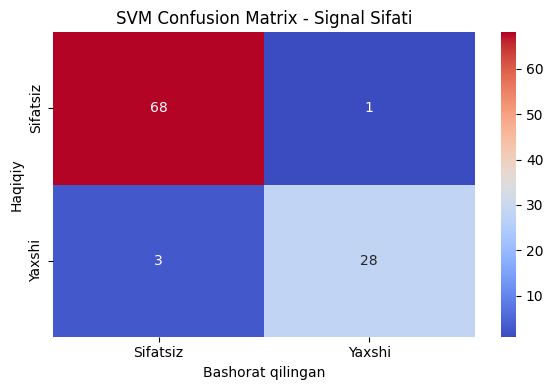

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Sifatsiz', 'Yaxshi'],
            yticklabels=['Sifatsiz', 'Yaxshi'])
plt.xlabel('Bashorat qilingan')
plt.ylabel('Haqiqiy')
plt.title('SVM Confusion Matrix - Signal Sifati')
plt.tight_layout()
plt.show()